# Image as grid of the pixel

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

Populating the interactive namespace from numpy and matplotlib


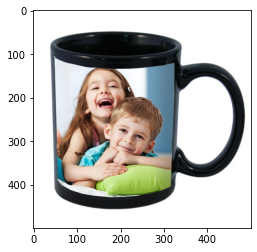

In [3]:
%pylab inline

image = mpimg.imread("mug.jpg")
plt.imshow(image)
plt.show()


Populating the interactive namespace from numpy and matplotlib


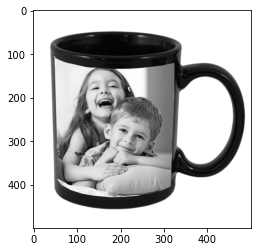

In [4]:
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY )
%pylab inline

plt.imshow(gray_image, cmap = "gray")
plt.show()

In [5]:
#specific pixel value

x = 100
y = 100

pixel_value = gray_image[x,y]

print(pixel_value)

30


# RGB Channels

In [6]:
#Individual channel and gray scale visualization

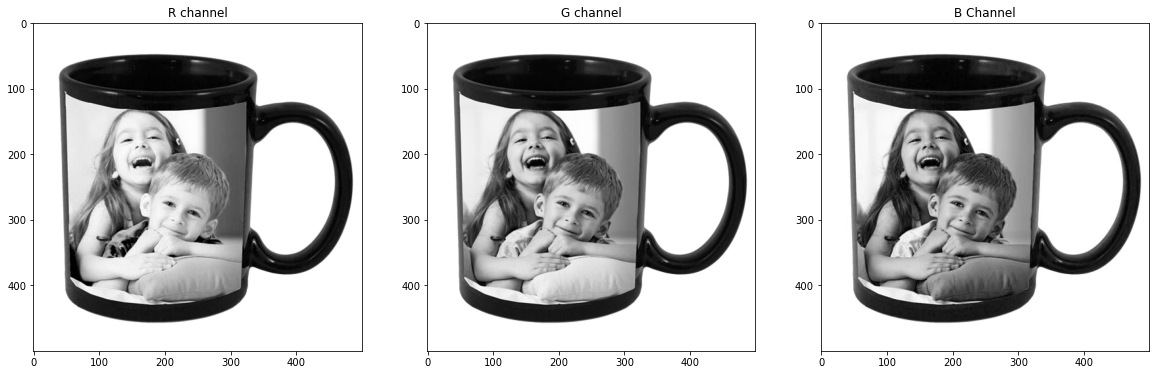

In [7]:
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize= (20,10))

ax1.set_title("R channel")
ax1.imshow(r,cmap = "gray")
ax2.set_title("G channel")
ax2.imshow(g,cmap = "gray")
ax3.set_title("B Channel")
ax3.imshow(b,cmap = "gray")

# Color Threshold (Masking)

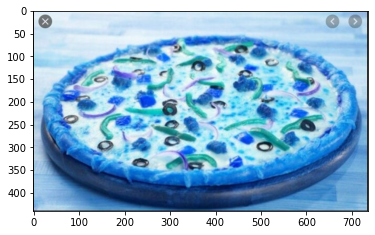

In [8]:
image = cv2.imread("pizza.JPG")
plt.imshow(image)

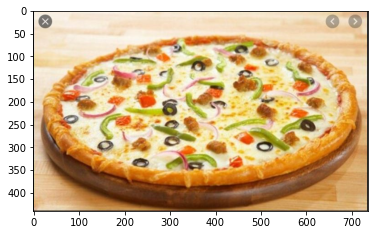

In [9]:
# copy the image 

image_copy= np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

In [10]:
image_copy = image_copy[0:420,0:736]

image_copy.shape

(420, 736, 3)

In [11]:
#https://www.w3schools.com/colors/colors_picker.asp

In [12]:

lower = np.array([100,100,100])
upper= np.array([255,255,255])

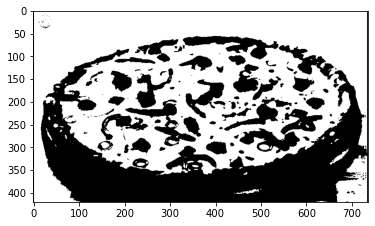

In [13]:
mask = cv2.inRange(image_copy,lower,upper)
plt.imshow(mask,cmap = "gray")

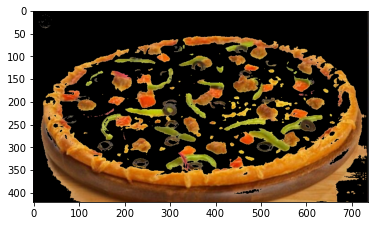

In [14]:
masked_image = np.copy(image_copy)

masked_image[mask != 0 ] = [0,0,0]

plt.imshow(masked_image)

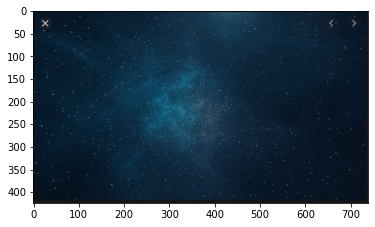

In [15]:
background = mpimg.imread("space2.JPG")
plt.imshow(background)

In [16]:
background.shape

(424, 739, 3)

In [17]:


crop_background = background[0:420, 0:736]

#print(crop_background.shape)

#crop_background[mask == 0 ] = [0,0,0]

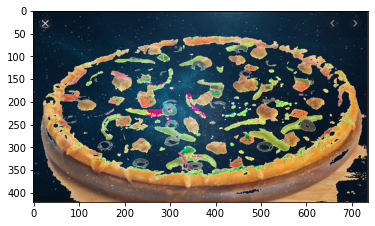

In [18]:
completed_image = masked_image + crop_background
plt.imshow(completed_image)

# Color spaces & Transform (Compare and HUE & RGB - Background Thresholding using HUE & RGB) 

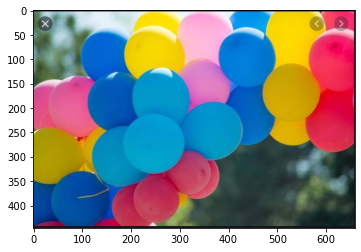

In [19]:
%matplotlib inline

# Read in the image
image = cv2.imread('ballon.JPG')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

##### RGB

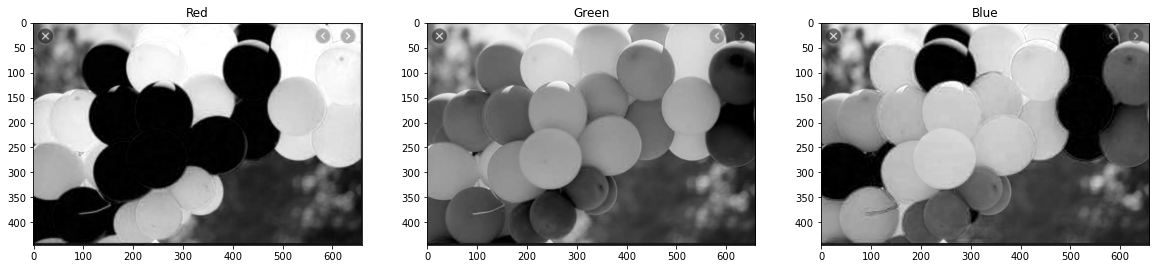

In [20]:
# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')


##### HSV

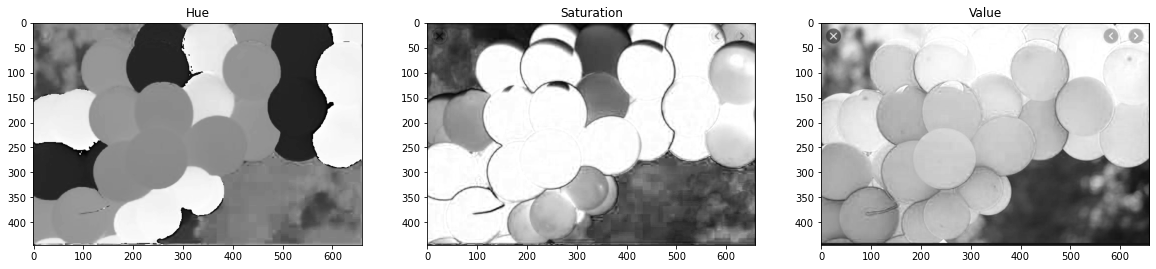

In [21]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')


In [22]:
# Define our color selection criteria in RGB values
lower_pink = np.array([180,0,100]) 
upper_pink = np.array([255,255,230])

##### HUE has value range from  0 to 180 degree.

In [23]:
# Define our color selection criteria in HSV values
lower_hue = np.array([160,0,0]) 
upper_hue = np.array([180,255,255])


##### RGB APPLY

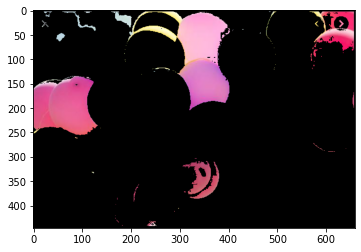

In [24]:
# Define the masked area in RGB space
mask_rgb = cv2.inRange(image, lower_pink, upper_pink)

# mask the image
masked_image = np.copy(image)
masked_image[mask_rgb==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

##### HSV APPLY

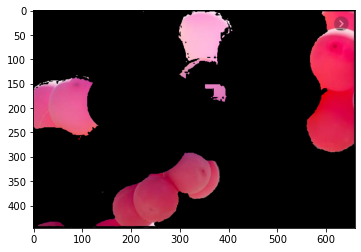

In [25]:
# Now try HSV!

# Define the masked area in HSV space
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(image)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

# Edge detection by using Sobel Filter

# Canny Edge detector

In [26]:
# direct edge detect and create binary

In [27]:
# Sunflower

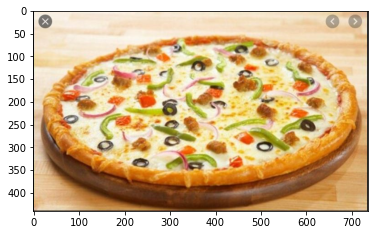

In [28]:
# Read in the image
image = cv2.imread('pizza.JPG')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

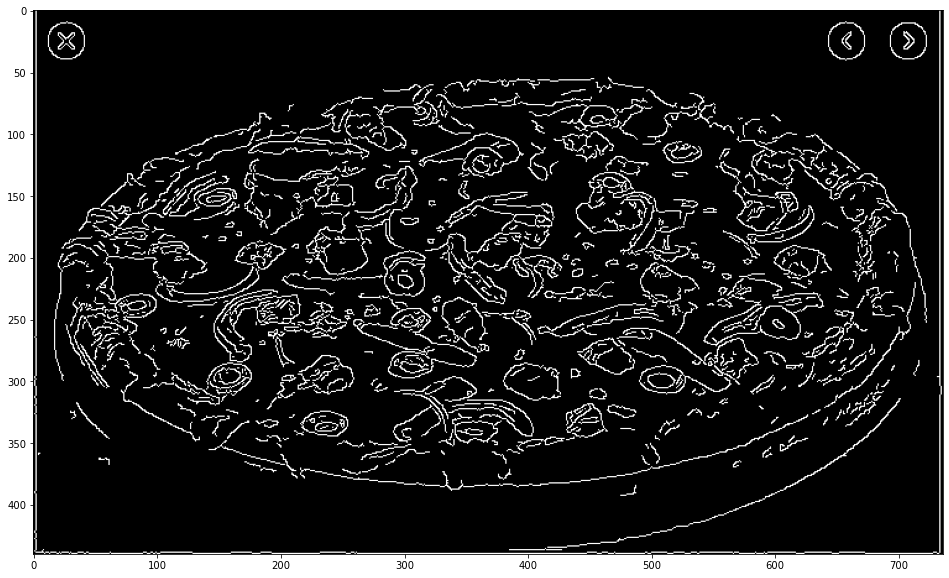

In [29]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

## TODO: Define lower and upper thresholds for hysteresis
# right now the threshold is so small and low that it will pick up a lot of noise
lower = 100
upper = 150

edges = cv2.Canny(gray, lower, upper)

plt.figure(figsize=(20,10))
plt.imshow(edges, cmap='gray')

# Object Boundary (Contour or Hough Transform)

### Hough Transform

In [30]:
# To detect the edges (line)

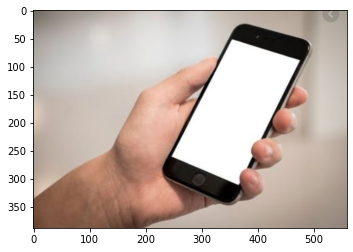

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('mobile.JPG')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

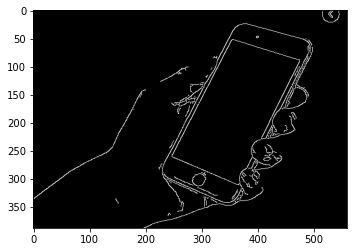

In [32]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define our parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

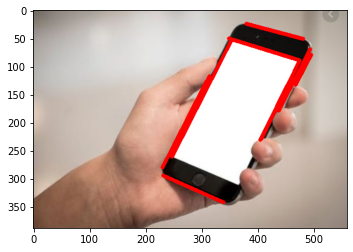

In [33]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 100
min_line_length = 50
max_line_gap = 5

line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)

# Face detector (Haar Cascade)

In [34]:
# face detect which is initial operation of cnn. But the difference is that discard the non face area.

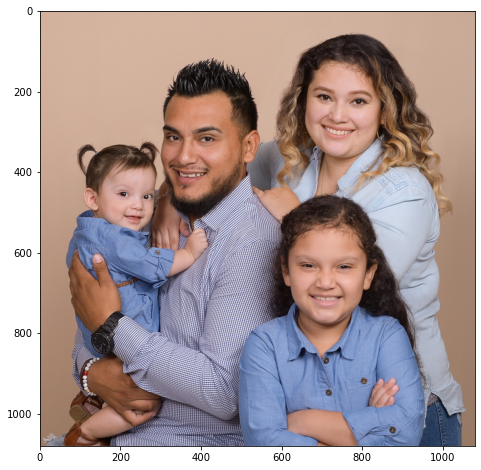

In [35]:
# load in color image for face detection
image = cv2.imread('family2.jpg')

# convert to RBG
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,8))
plt.imshow(image)

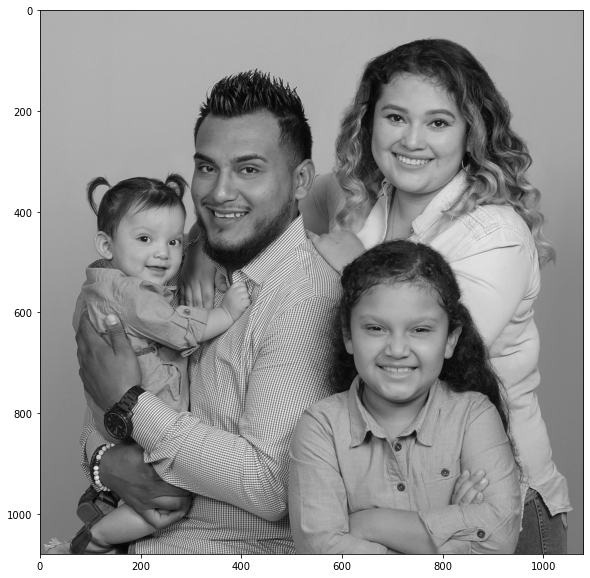

In [36]:
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  

plt.figure(figsize=(20,10))
plt.imshow(gray, cmap='gray')

In [37]:
# load in cascade classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# run the detector on the grayscale image
faces = face_cascade.detectMultiScale(gray, 4, 6)

In [38]:
# print out the detections found
print ('We found ' + str(len(faces)) + ' faces in this image')
print ("Their coordinates and lengths/widths are as follows")
print ('=============================')
print (faces)

We found 0 faces in this image
Their coordinates and lengths/widths are as follows
()


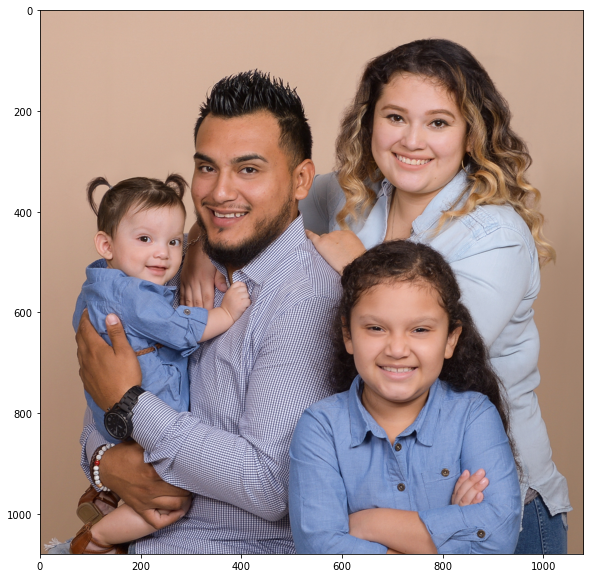

In [39]:
img_with_detections = np.copy(image)   # make a copy of the original image to plot rectangle detections ontop of

# loop over our detections and draw their corresponding boxes on top of our original image
for (x,y,w,h) in faces:
    # draw next detection as a red rectangle on top of the original image.  
    # Note: the fourth element (255,0,0) determines the color of the rectangle, 
    # and the final argument (here set to 5) determines the width of the drawn rectangle
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),5)  

# display the result
plt.figure(figsize=(20,10))
plt.imshow(img_with_detections)